In [1]:
import os 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real word space
imgpoints = [] # 2d points in image plane

nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0)..., (8,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape([-1,2]) #x, y coordinates


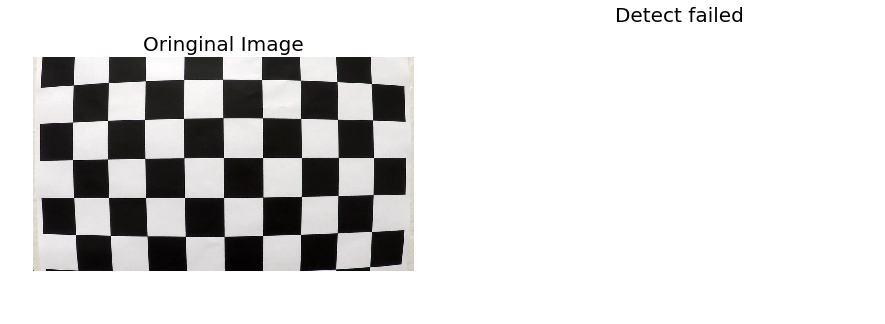

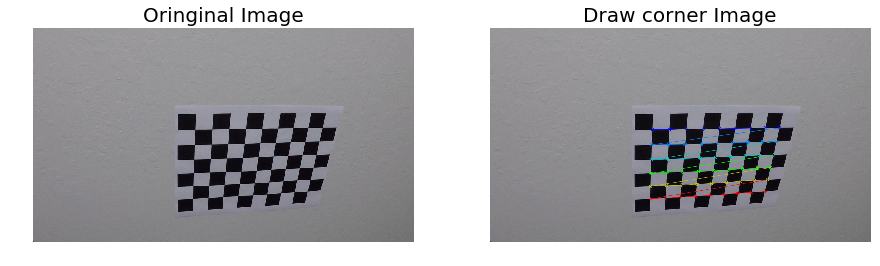

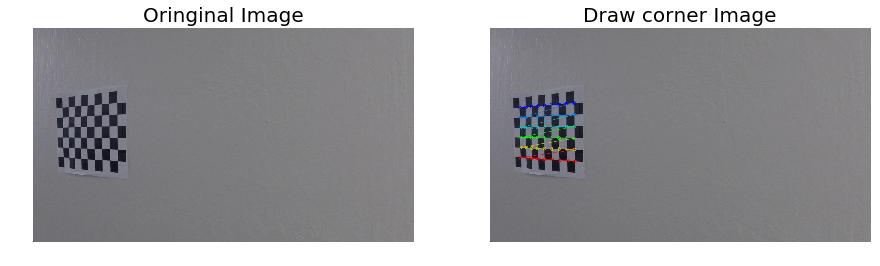

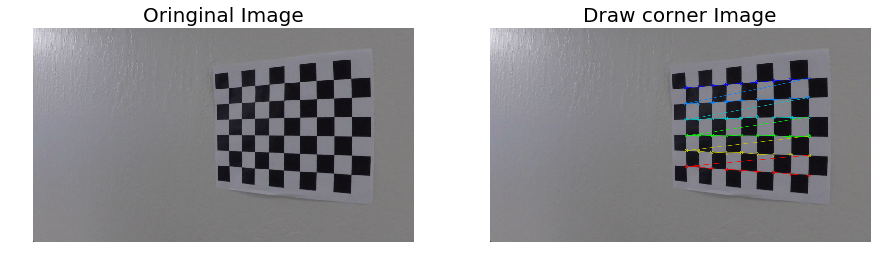

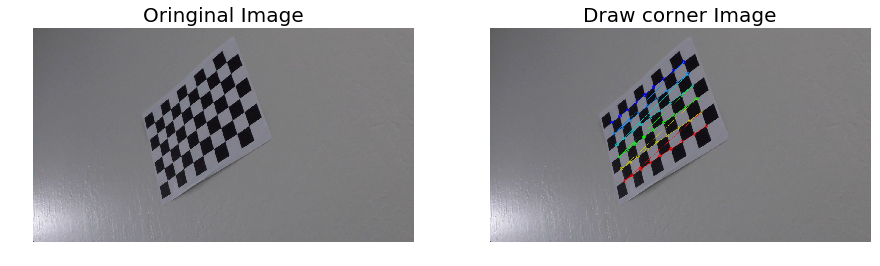

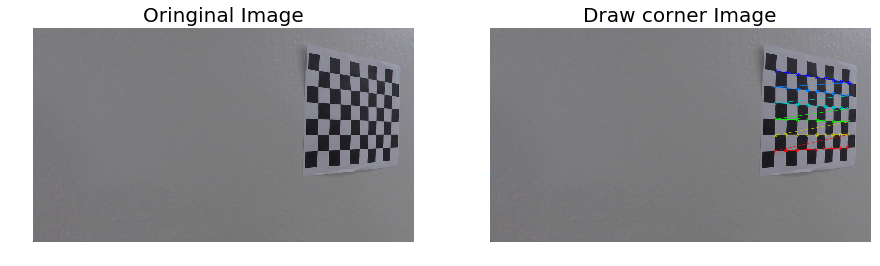

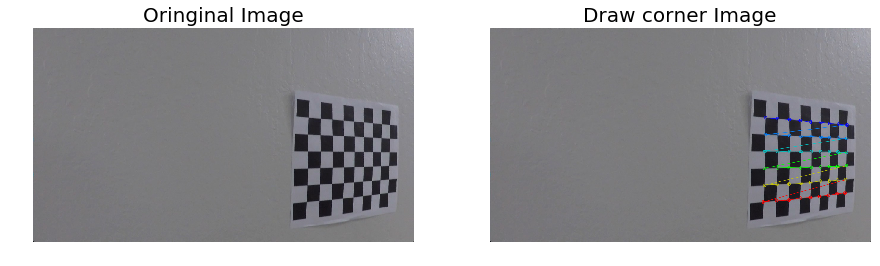

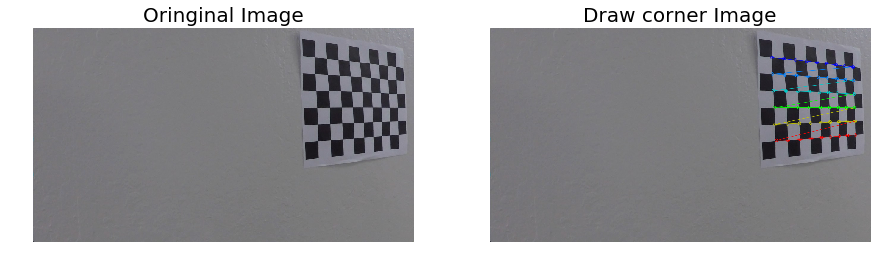

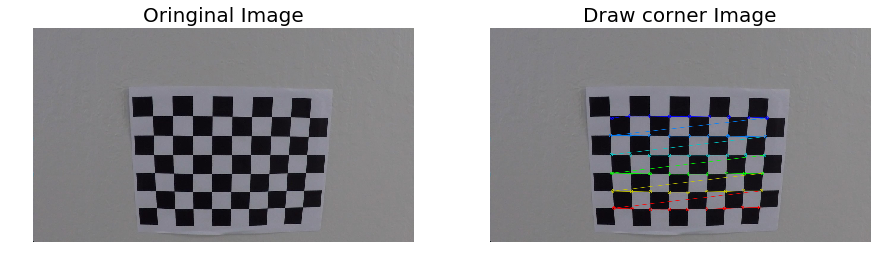

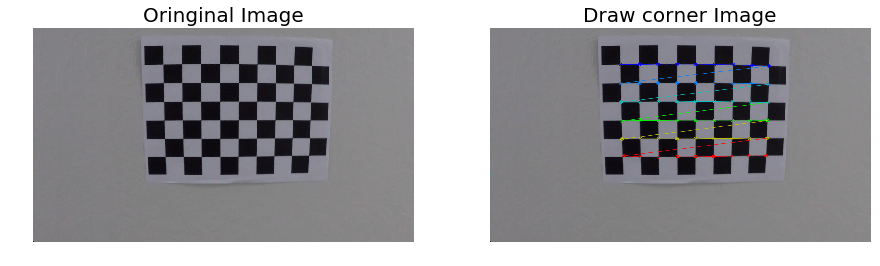

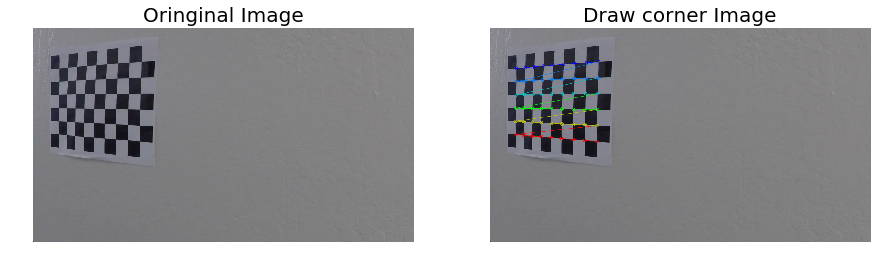

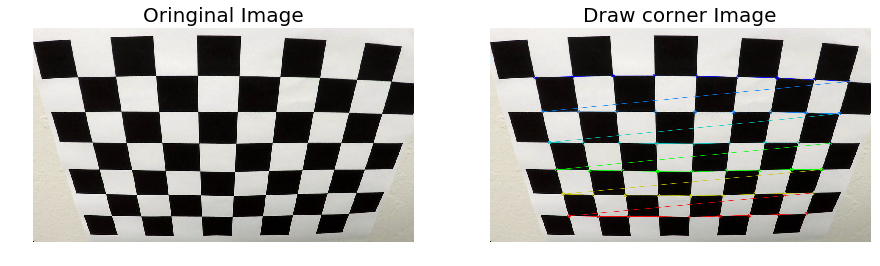

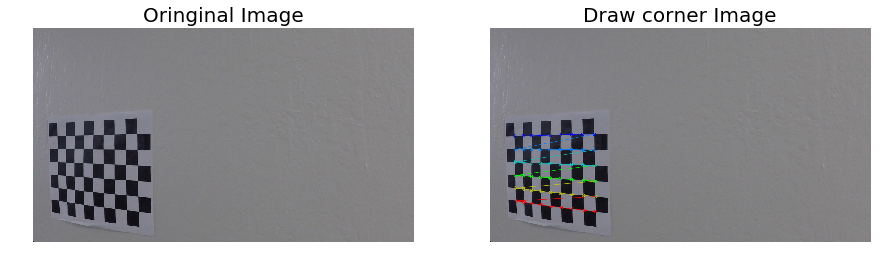

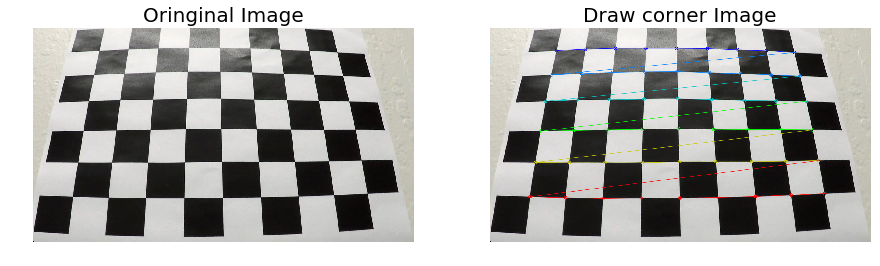

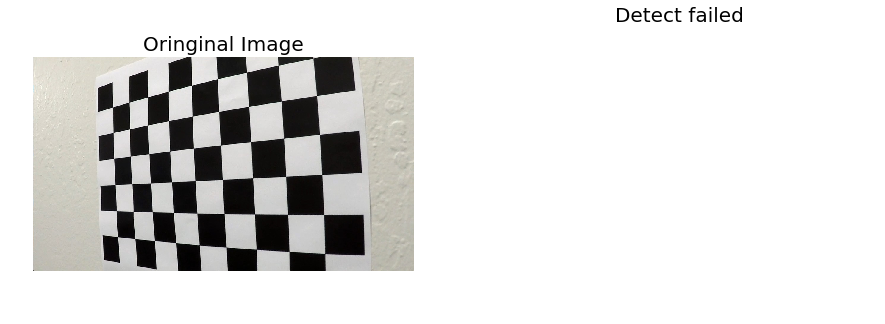

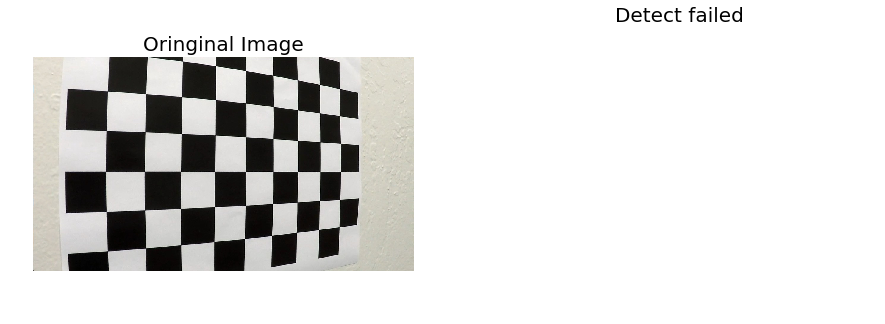

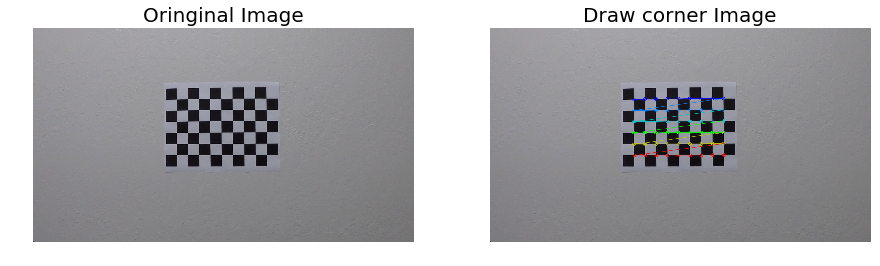

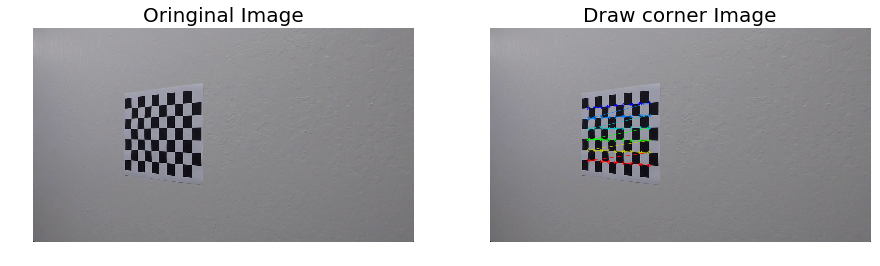

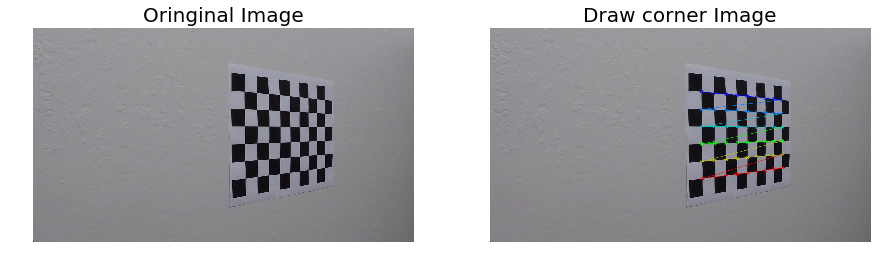

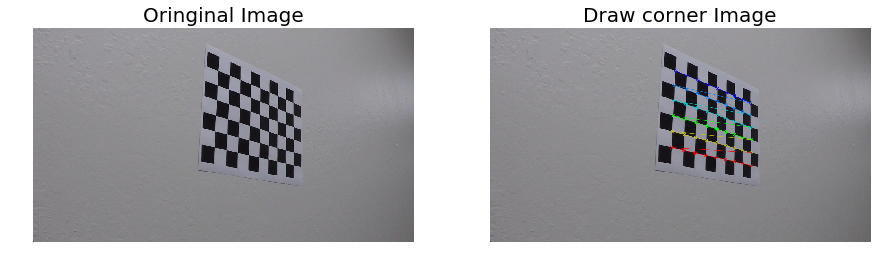

In [3]:
# Read in and Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

for fname in images:
    image = mpimg.imread(fname)
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title('Oringinal Image',fontsize=20)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add to imgpoints
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # Draw and display the corners
        image_draw_coners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        ax2.imshow(image_draw_coners)
        ax2.axis('off')
        ax2.set_title('Draw corner Image',fontsize=20)
    else:
        ax2.axis('off')
        ax2.set_title('Detect failed',fontsize=20)

In [4]:
def cal_undistort(image, objpoints, imgpoints):
    '''
    undistort image
    
    takes an image, object points, and image points 
    performs the camera calibration, image distortion correction and 
    returns the undistorted image
    '''
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(image, mtx, dist, None, mtx)

    return undist

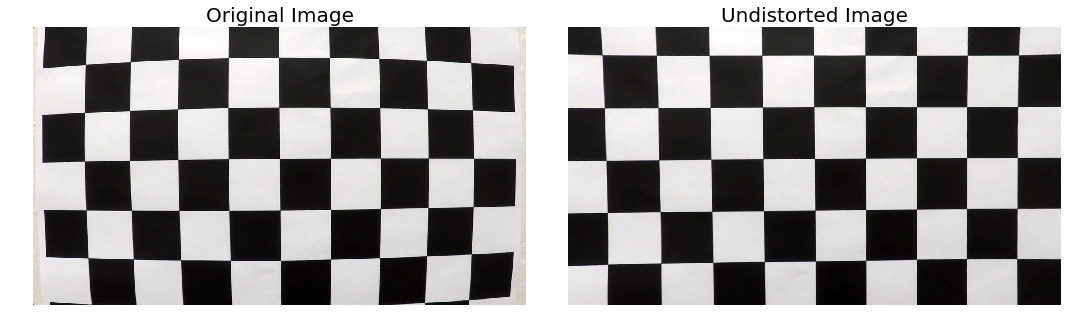

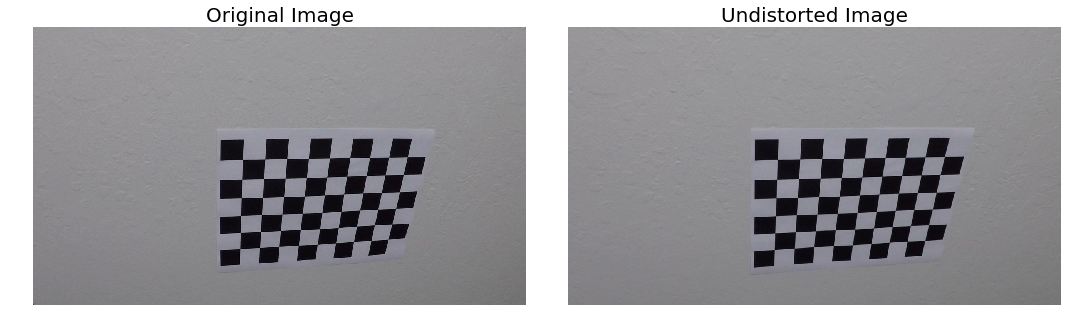

In [33]:
for fname in images[:2]:
    image = mpimg.imread(fname)
    undistorted = cal_undistort(image,objpoints,imgpoints)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image',fontsize=20)
    ax1.axis('off')
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image',fontsize=20)
    ax2.axis('off')

In [34]:
def corners_unwarp(img, nx, ny):
    # Undistort using mtx and dist
    undst = cal_undistort(img, objpoints, imgpoints)
    # Convert to grayscale
    gray = cv2.cvtColor(undst,cv2.COLOR_RGB2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If corners found: 
    if ret:
#         # draw corners
#         cv2.drawChessboardCorners(gray, (nx, ny), corners, ret)
#         plt.figure()
#         plt.imshow(gray)
#         plt.show()
        offset = 120 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
        
        # define 4 source points 
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # define 4 destination points 
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # get the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # warp image to a top-down view
        warped = cv2.warpPerspective(undst, M, img_size, flags=cv2.INTER_LINEAR)
        
        return warped, M

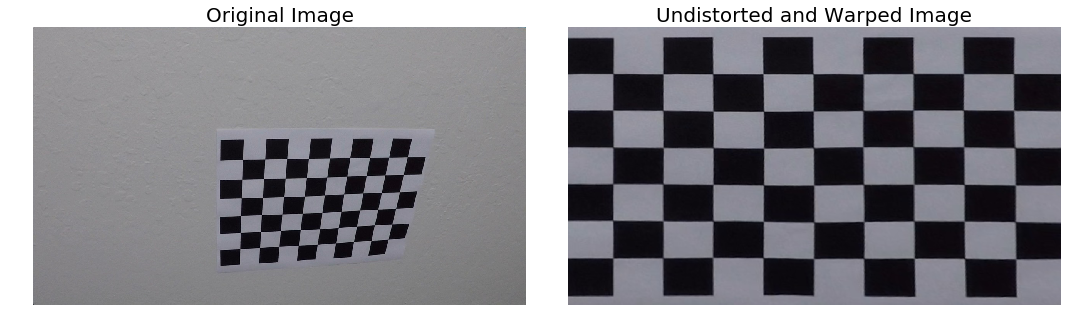

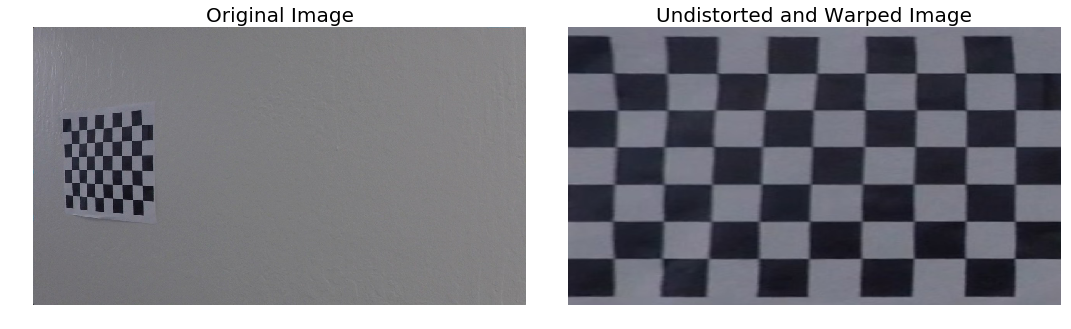

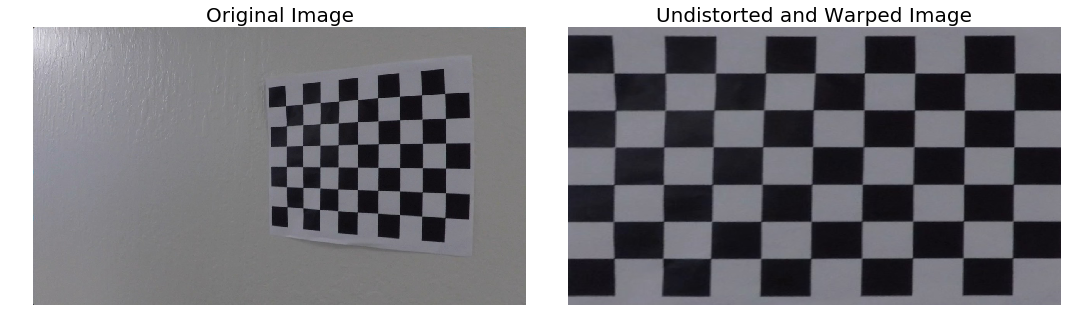

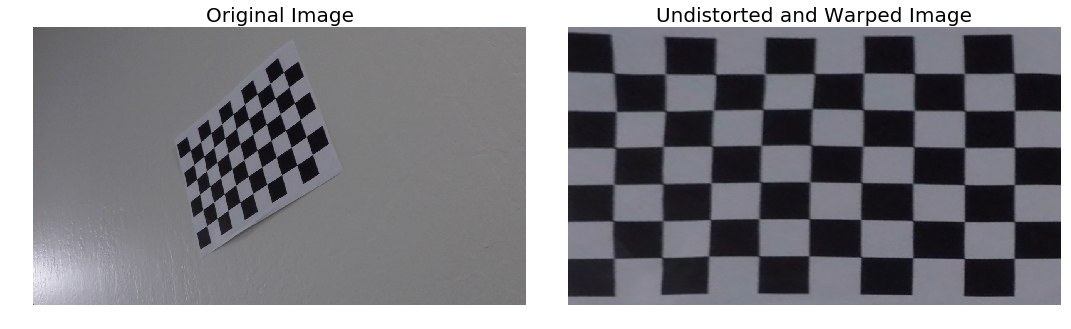

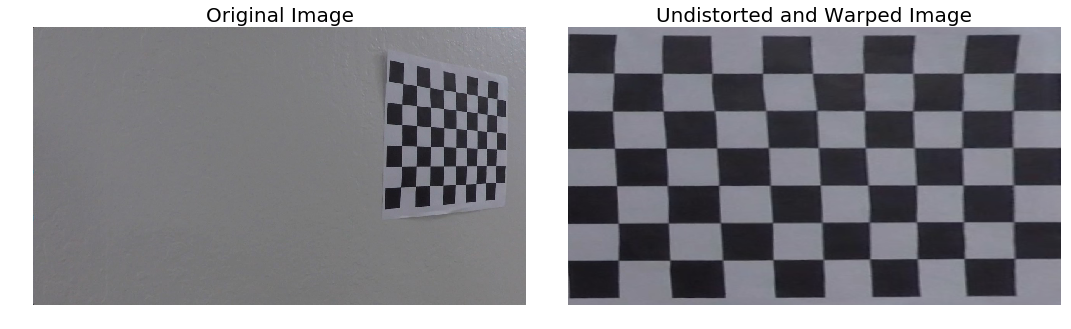

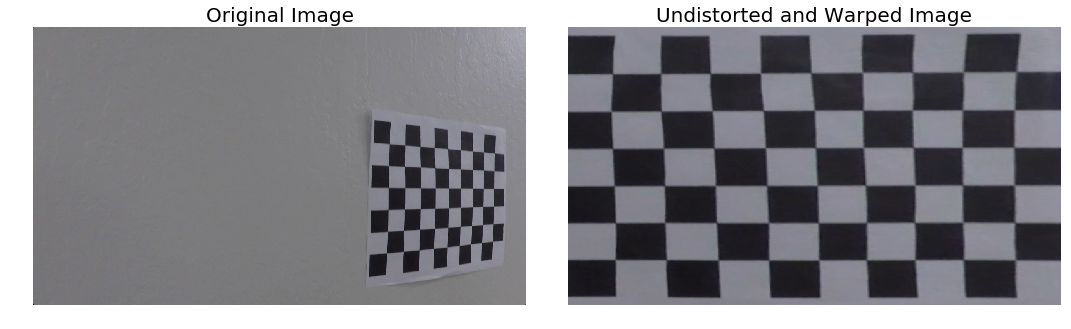

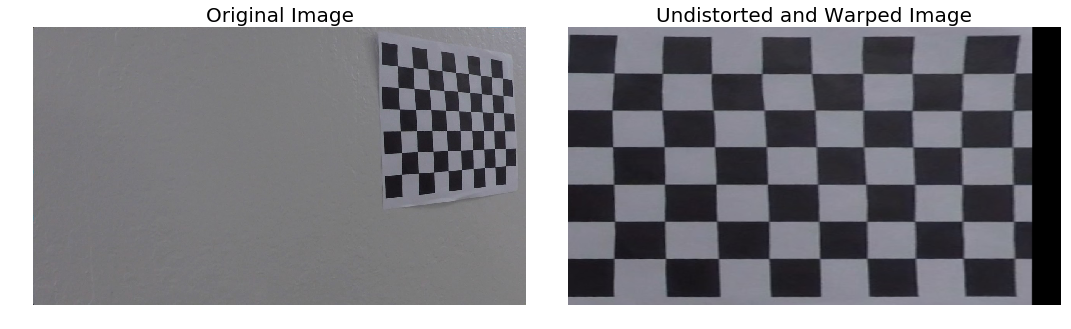

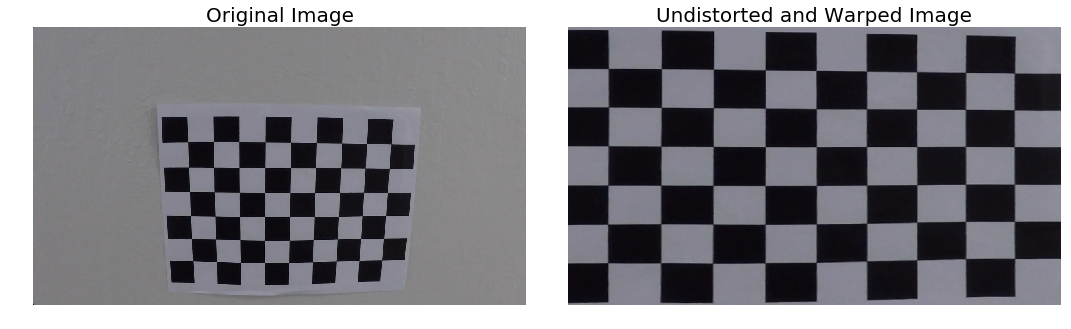

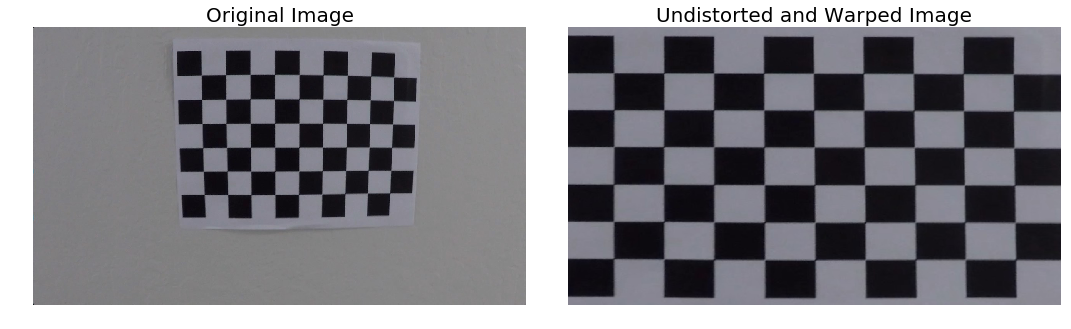

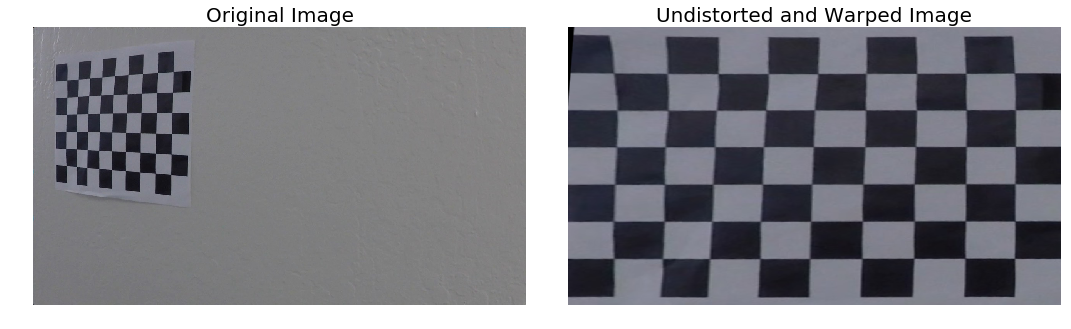

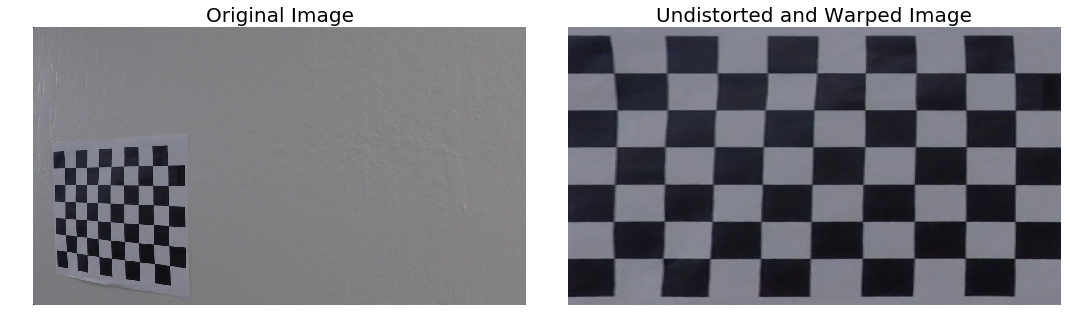

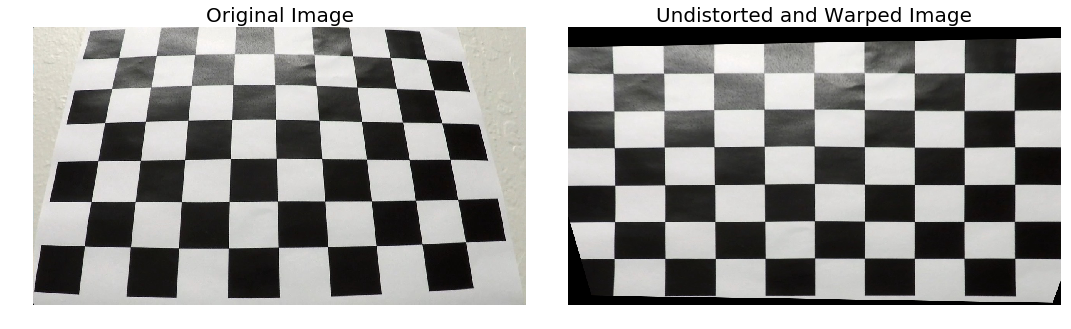

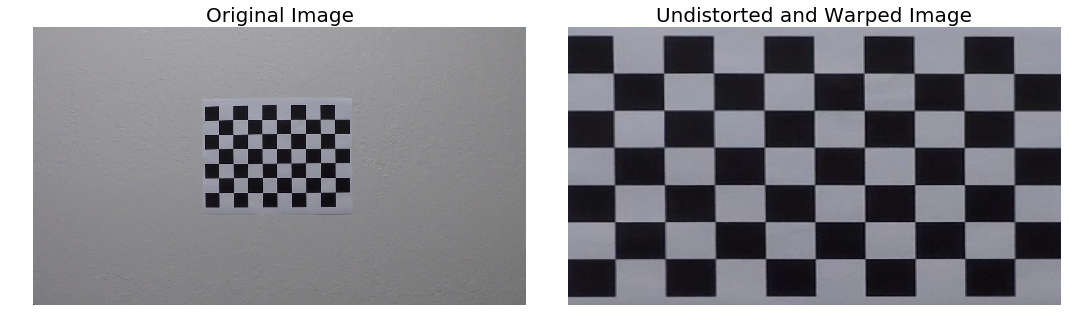

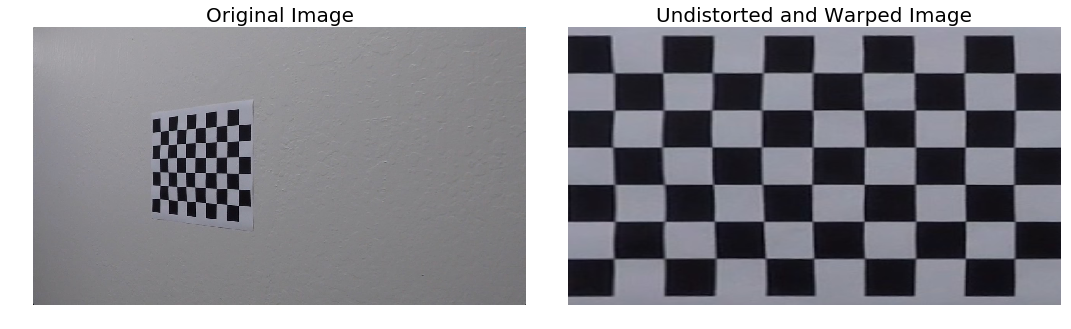

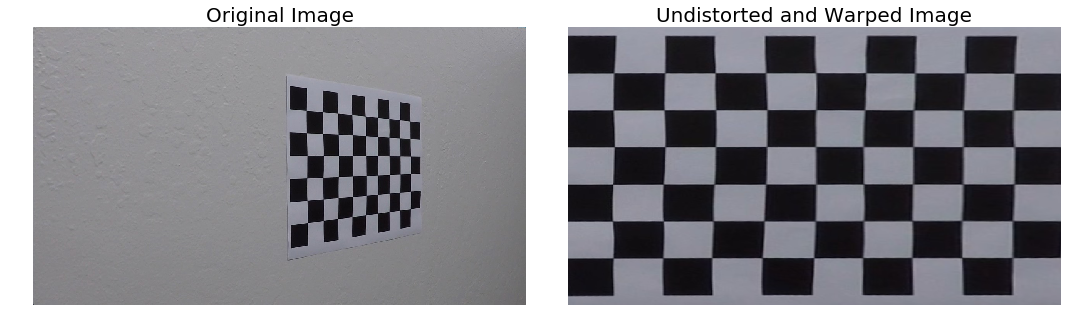

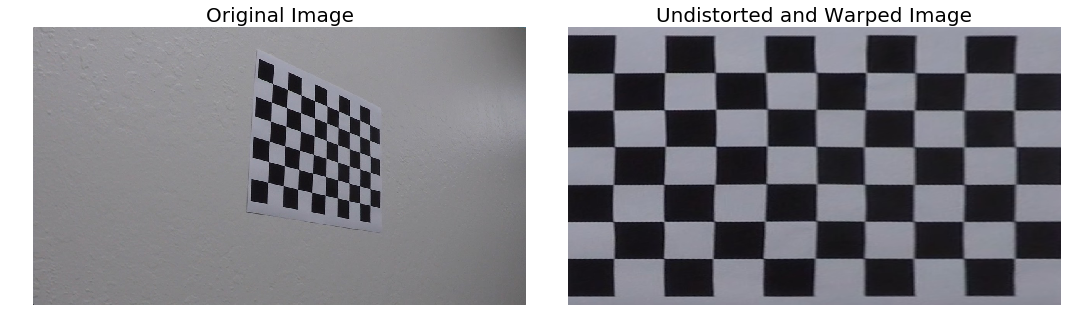

In [35]:
for fname in images:
    img = mpimg.imread(fname)
    try:
        top_down, perspective_M = corners_unwarp(img, nx, ny)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=20)
        ax1.axis('off')
        ax2.imshow(top_down)
        ax2.set_title('Undistorted and Warped Image', fontsize=20)
        ax2.axis('off')
    except TypeError:
        pass

In [ ]:
test_images = glob.glob('test_images/*.jpg')

for fname in test_images:
    image = mpimg.imread(fname)
    undistorted = cal_undistort(image,objpoints,imgpoints)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=20)
    ax1.axis('off')
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=20)
    ax2.axis('off')